# Importing Required Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Training Data

In [2]:
dataset = pd.read_csv("/kaggle/input/concrete-strength-regression/train.csv")
dataset.head()

,Row ID,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,0,184.0,86.0,190.0,213.0,6.0,923.0,623.0,28,22.93
1,1,313.3,145.0,0.0,178.5,8.0,1001.9,688.7,28,41.05
2,2,387.0,20.0,94.0,157.0,13.9,938.0,845.0,7,45.90
3,3,162.0,214.0,164.0,202.0,10.0,820.0,680.0,28,30.65
4,4,252.3,0.0,98.8,146.3,14.2,987.8,889.0,14,42.29


In [3]:
print(dataset.shape)

print(dataset.columns)

(721, 10)
Index(['Row ID', 'cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')


In [4]:
dataset.dtypes.value_counts()


float64    8
int64      2
Name: count, dtype: int64

In [5]:
dataset.isna().sum()

Row ID              0
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [6]:
# Dropping Row ID from dataset

dataset.drop(['Row ID'], axis=1, inplace = True)

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,721.0,280.629681,103.113264,102.00,194.70,273.00,359.00,540.0
slag,721.0,74.736338,85.698317,0.00,0.00,24.00,142.80,359.4
flyash,721.0,54.874064,63.334382,0.00,0.00,0.00,118.20,200.0
water,721.0,181.029820,21.572810,121.80,164.90,184.00,192.00,247.0
superplasticizer,721.0,6.503190,5.995274,0.00,0.00,6.90,10.60,32.2
coarseaggregate,721.0,971.401664,76.522551,801.00,932.00,967.00,1028.40,1134.3
fineaggregate,721.0,775.125798,78.886793,594.00,734.00,780.00,825.00,992.6
age,721.0,44.951456,60.426508,1.00,14.00,28.00,56.00,365.0
csMPa,721.0,36.163148,17.195567,2.33,23.35,34.57,47.71,82.6


# Data Visualisation

(9.5, -0.5)

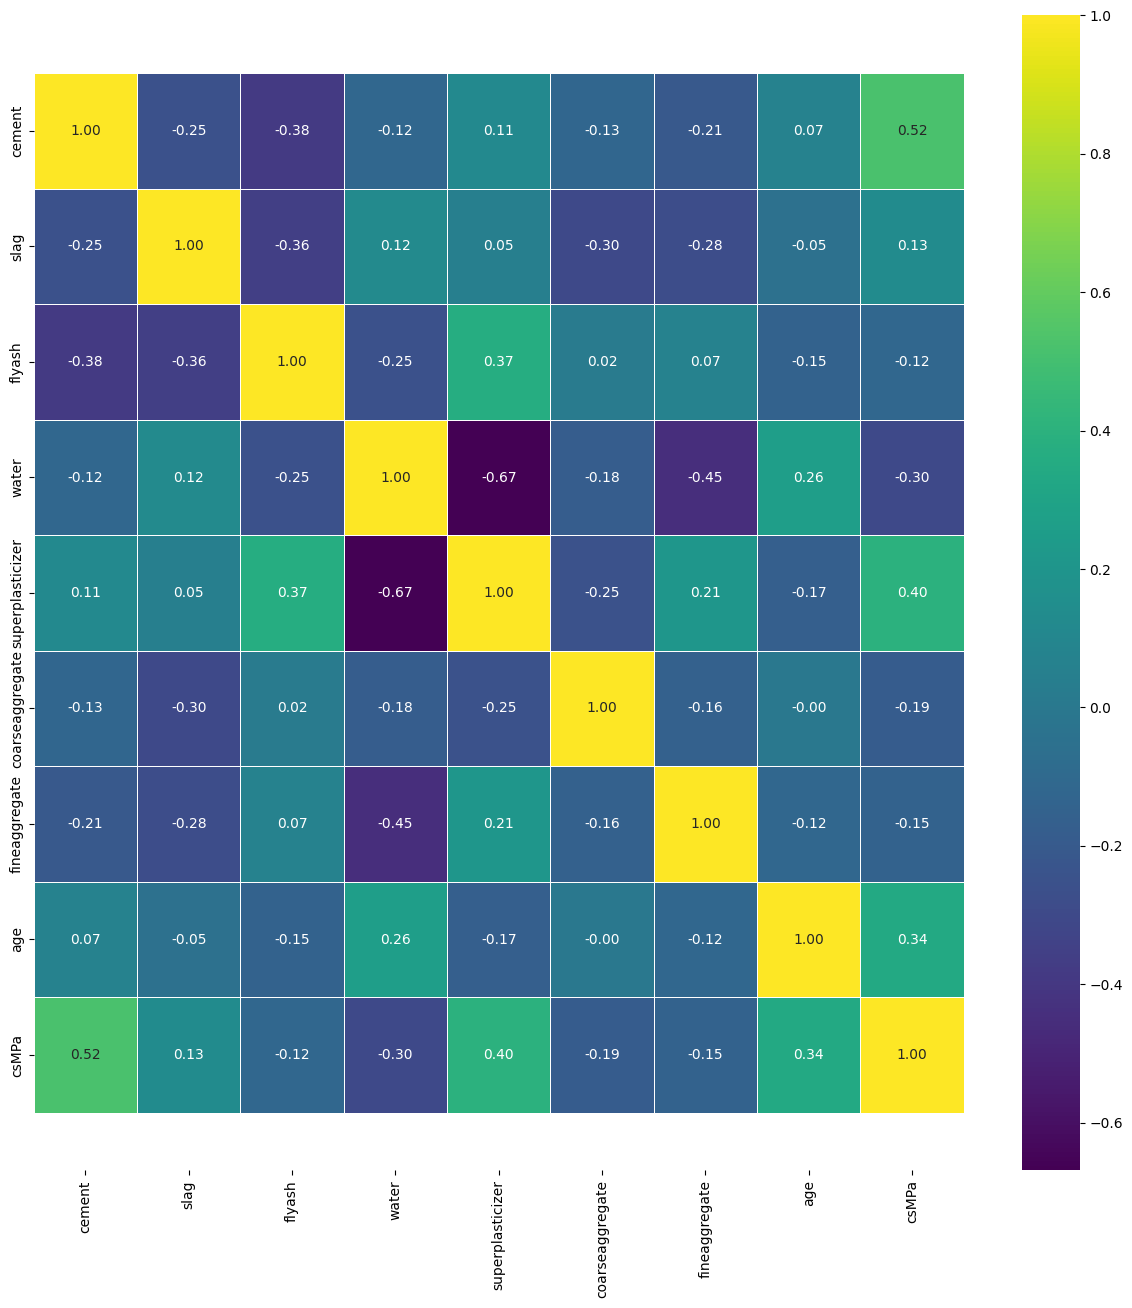

In [8]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5,fmt=".2f", cmap="viridis");                                  
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with csMPa )'}>

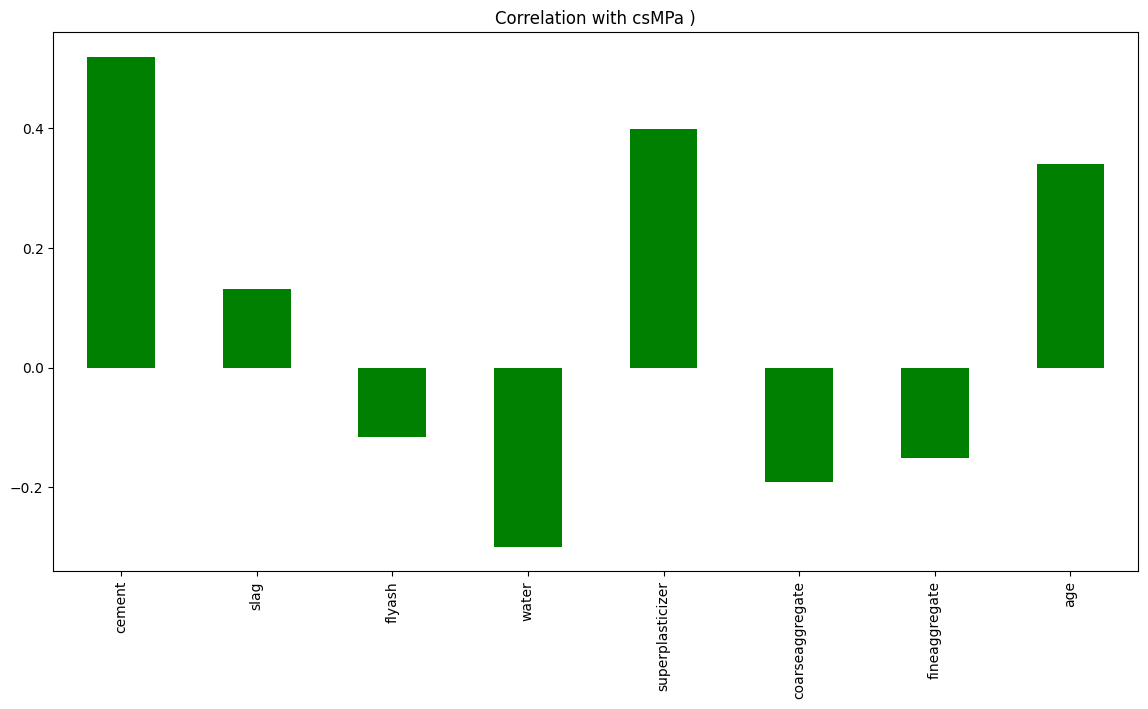

In [9]:
dataset.drop('csMPa', axis=1).corrwith(dataset.csMPa).plot(kind='bar', color='Green', figsize=(14, 7), title="Correlation with csMPa )")


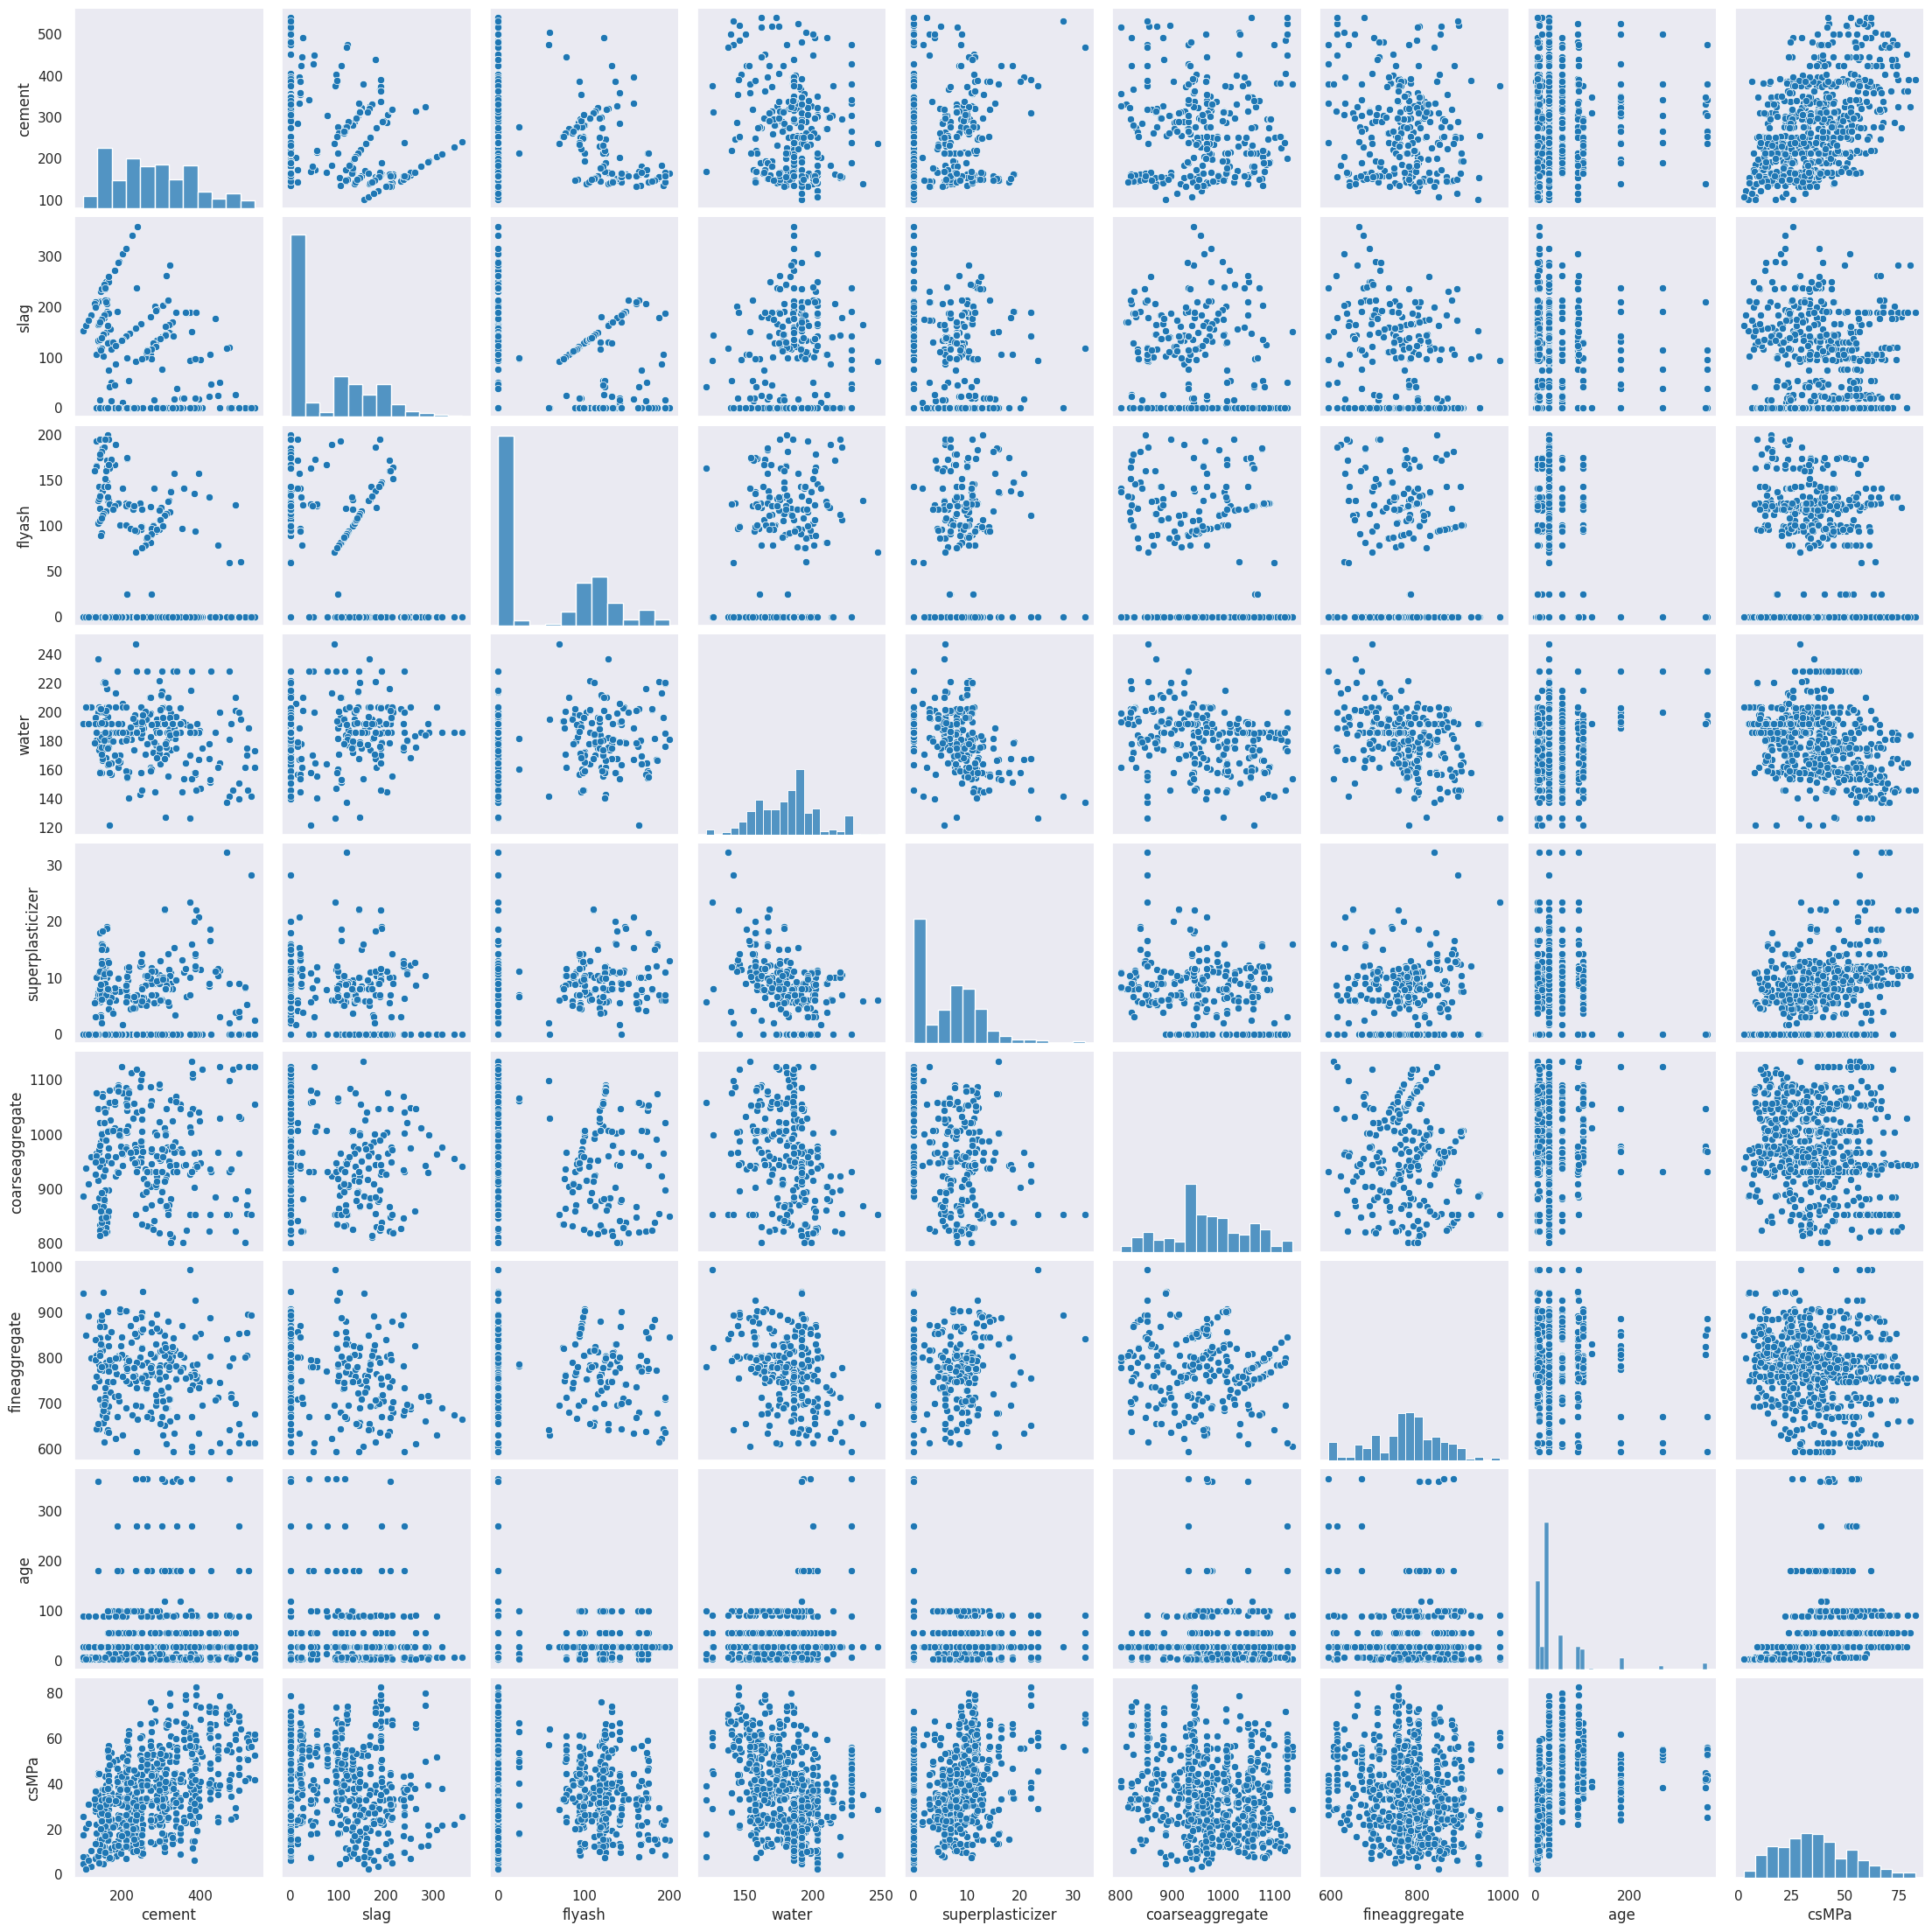

In [10]:
# Plotting

sns.set_context('notebook')
sns.set_style('dark')
sns.pairplot(dataset);

In [11]:
# Choosing X and y 

X = dataset.drop('csMPa', axis=1)
y = dataset.csMPa

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Test Data

In [13]:
dataset_test = pd.read_csv("/kaggle/input/concrete-strength-regression/test.csv")
dataset_test1 = dataset_test.copy()

dataset_test.head()

,Row ID,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,721,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,14
1,722,255.5,170.3,0.0,185.7,0.0,1026.6,724.3,28
2,723,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,3
3,724,318.8,212.5,0.0,155.7,14.3,852.1,880.4,28
4,725,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,56


In [14]:
dataset_test.isna().sum()

Row ID              0
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
dtype: int64

In [15]:
# Dropping Row ID from dataset

dataset_test.drop(['Row ID'], axis=1, inplace = True)

# Machine Learning

### XGB regressor model

In [16]:
reg = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [17]:
reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [18]:
pred_t = reg.predict(X_test)

# Evaluation

### R-Squared Error

In [19]:
print("R^2 on training  data ",reg.score(X_train, y_train))
print("R^2 on testing data ",reg.score(X_test,y_test))

R^2 on training  data  0.9945165284270923
R^2 on testing data  0.9358740109276634


### RMSE

In [20]:
mse = mean_squared_error(y_test, pred_t)
rmse = np.sqrt(mse)
rmse


4.339805887082602

# Prediction

In [21]:
pred_xgb = reg.predict(dataset_test)

In [22]:
pred1 = pd.DataFrame(pred_xgb, columns=['csMPa'])
pred2 = pd.concat([dataset_test1['Row ID'],pred1],axis=1).set_index(['Row ID'])
pred2.to_csv('submission.csv')